<a href="https://colab.research.google.com/github/dwhew/data_science/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank/sort. must prioritise attributes)






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy



## prelim experimention with data

In [2]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [3]:
len(inndf)/365

5.002739726027397

In [4]:
len(inndf.loc[inndf['min_temp (deg C)'] < 0])/5

99.8

In [5]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [6]:
inndf['year'].value_counts()

2016    366
2019    365
2018    365
2017    365
2015    365
Name: year, dtype: int64

 # load  city data

In [7]:
#inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
sindf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv')
syddf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Sydney_weather_2015-19.csv')
tehdf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Tehran_weather_2015-19.csv')





# by number of days. I.e sunny days, perfect days...

In [8]:
#no. of days without rain (annual average)
inn_nrain = len(inndf[inndf['precip_sum (mm)'] == 0.0]) /5
lon_nrain = len(londf[londf['precip_sum (mm)'] == 0.0]) /5
print(lon_nrain, inn_nrain)

# barometric pressure over 1022.689 mb indicates clear and stable (google.com)

198.0 165.8


In [9]:
#perfect days
inn_perf = inndf[(inndf["precip_sum (mm)"] == 0.0) & (inndf["max_temp (deg C)"] > 25) & (inndf["min_temp (deg C)"] > 10) & (inndf["mean_wind (ms-1)"] < 4)]
inn_perf

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
137,2015-05-18,18.804167,12.4,27.8,708.341667,62.708333,2.500000,0.0,May,May-2015,2015
155,2015-06-05,24.300000,15.0,32.1,714.460000,59.700000,1.900000,0.0,Jun,Jun-2015,2015
176,2015-06-26,19.410000,10.1,25.7,714.620000,57.400000,2.000000,0.0,Jun,Jun-2015,2015
179,2015-06-29,20.310000,12.6,26.3,714.800000,60.800000,1.600000,0.0,Jun,Jun-2015,2015
180,2015-06-30,21.830000,12.5,29.3,714.460000,58.000000,1.800000,0.0,Jun,Jun-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1702,2019-08-30,20.079167,13.3,28.0,715.533333,74.083333,1.750000,0.0,Aug,Aug-2019,2019
1703,2019-08-31,20.912500,13.5,30.1,712.175000,68.958333,3.416667,0.0,Aug,Aug-2019,2019
1718,2019-09-15,18.520833,11.1,27.8,717.195833,75.875000,1.375000,0.0,Sep,Sep-2019,2019
1719,2019-09-16,18.666667,11.7,27.9,713.920833,73.666667,1.416667,0.0,Sep,Sep-2019,2019


In [10]:
#create new dataframe

#assign cities to a list for later use
citylist = ['Innsbruck', 'London', 'Singapore', 'Sydney', 'Tehran']

#assign dfs to list for later iterating
dflist = ['inndf', 'londf', 'syddf', 'syddf', 'tehdf']

citystats = pd.DataFrame({'City': citylist })
citystats['Days of no rain'] = [inn_nrain, lon_nrain, '', '', '']
citystats

,City,Days of no rain
0,Innsbruck,165.8
1,London,198
2,Singapore,
3,Sydney,
4,Tehran,


# group by months

In [11]:
#get average day by month
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

inndf_months = inndf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
londf_months = londf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
sindf_months = sindf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
syddf_months = syddf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
tehdf_months = tehdf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])



In [12]:
#compare two data frames 
inndf_months.compare(londf_months, keep_equal=True)

mean_temp (deg C)             ... precip_sum (mm)          
                   self      other  ...            self     other
month                               ...                          
Jan           -1.036986   5.452045  ...        7.080000  2.601290
Feb            1.459536   5.888956  ...        3.158865  1.994326
Mar            6.061640   7.928891  ...        4.507097  2.336000
Apr           10.601215  10.405160  ...        5.587333  1.433333
May           14.001605  13.945328  ...       10.334839  2.233548
Jun           18.983879  17.205025  ...       11.106667  2.381333
Jul           19.910417  19.583573  ...       11.485806  2.394839
Aug           19.554905  18.449890  ...       14.955484  2.714839
Sep           14.570158  15.556601  ...        9.295333  2.246667
Oct           10.473568  12.279683  ...        5.921935  2.256774
Nov            5.024660   8.424954  ...        4.234000  2.818667
Dec            0.367959   7.878952  ...        4.063226  2.921290

[12 rows x 14 columns]

In [22]:
# create new dfs for groupby.sum()
# Here I iterated through a list of the dataframes 'dflist'. this is neater than writing the code for each city but hard to read. would be really usefull for when there are alot more cities. 
# it would also make it easier to add more cities later

for i in dflist:
  exec(str(i) + '_sum = ' + str(i) + '.groupby(by=[\'month\']).sum().reindex(month_ordered)')

# substitute into inndf_months

for i in dflist:
  exec(str(i) + '_months[\'precip_sum (mm)\'] = ' + str(i) + '_sum[\'precip_sum (mm)\']')

#check a df
sindf_months


,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm)
month,,,,,,,
Jan,27.213433,24.963871,30.930968,756.874839,81.759793,2.839862,5.714839
Feb,27.405762,24.958865,31.416312,757.529965,78.876773,3.498227,3.174468
Mar,28.214435,25.548387,32.508387,756.974735,77.933065,3.039977,2.979355
Apr,28.574750,25.874667,32.849333,756.156083,79.456667,2.342500,5.446667
May,28.847258,26.298065,32.307742,756.005242,80.430645,2.399194,4.634839
Jun,28.561083,26.001333,31.556000,756.277000,79.450000,2.578333,7.650667
Jul,28.643306,26.359355,31.603871,756.296452,77.893548,3.176613,4.423226
Aug,28.608065,26.412903,31.684516,756.269597,76.882258,3.325806,4.781935
Sep,28.381333,25.844667,31.840000,756.683583,77.056667,2.859167,4.710000


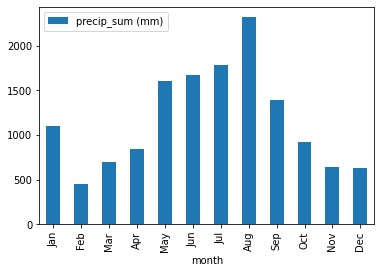

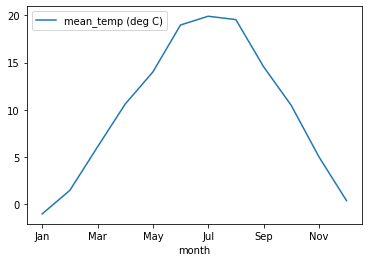

In [14]:
#graphs
inndf_months.plot(y=['precip_sum (mm)'], kind= 'bar')
inndf_months.plot(y=['mean_temp (deg C)'])

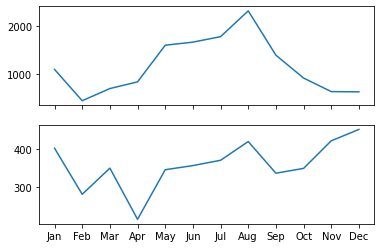

In [15]:
#Plot with subplots (still learning this one, needs work)
fig, (ax, ax1) = plt.subplots(2, sharex=True)

ax.plot(inndf_months['precip_sum (mm)'])
ax1.plot(londf_months['precip_sum (mm)'])


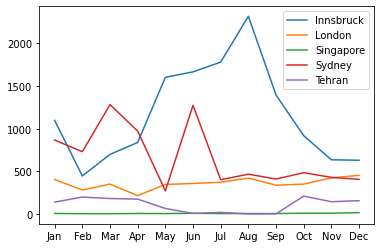

In [16]:
#plot on same graph
plt.plot(inndf_months['precip_sum (mm)'])
plt.plot(londf_months['precip_sum (mm)'])
plt.plot(sindf_months['precip_sum (mm)'])
plt.plot(syddf_months['precip_sum (mm)'])
plt.plot(tehdf_months['precip_sum (mm)'])
plt.legend(citylist)
plt.show()

##inspect singapore rainfall data

       mean_temp (deg C)  min_temp (deg C)  ...  mean_wind (ms-1)  precip_sum (mm)
month                                       ...                                   
Jan            27.213433         24.963871  ...          2.839862         5.714839
Feb            27.405762         24.958865  ...          3.498227         3.174468
Mar            28.214435         25.548387  ...          3.039977         2.979355
Apr            28.574750         25.874667  ...          2.342500         5.446667
May            28.847258         26.298065  ...          2.399194         4.634839
Jun            28.561083         26.001333  ...          2.578333         7.650667
Jul            28.643306         26.359355  ...          3.176613         4.423226
Aug            28.608065         26.412903  ...          3.325806         4.781935
Sep            28.381333         25.844667  ...          2.859167         4.710000
Oct            28.199839         25.443871  ...          2.272043         8.292903
Nov 

1826

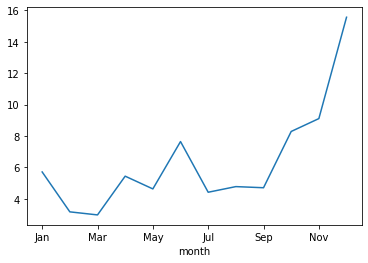

In [28]:
#singapore looks wrong for a city in the tropics
print(sindf_months)
sindf_months['precip_sum (mm)'].plot()
len(sindf['precip_sum (mm)'] == 0)

In [38]:
#error with data. 918 days recorded no rain
len(sindf.loc[sindf['precip_sum (mm)'] == 0])


918

# statistical comparisons

In [17]:

# Analysis of Variance Test (ANOVA) 
from scipy.stats import f_oneway

#compare mean temperatures between innsbruck and london
stat, p = f_oneway(inndf_months['precip_sum (mm)'], londf_months['precip_sum (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Not Significantly different')
else:
	print('Significantly different')


stat=23.233, p=0.000
Significantly different
